In [1]:
import os
print(os.listdir())  # This will list all files in the current directory


['.venv', 'CVD_cleaned.csv', 'General health prediction.docx', 'General_health_prediction.ipynb']


In [2]:
import os
print(os.listdir())  # This will list all files in the current directory


['.venv', 'CVD_cleaned.csv', 'General health prediction.docx', 'General_health_prediction.ipynb']


In [3]:
import pandas as pd  # For handling data
import numpy as np   # For numerical operations

# Load the dataset (Make sure the file name matches exactly)
df = pd.read_csv("CVD_cleaned.csv")

# Display the first 5 rows to check if the data is loaded correctly
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [4]:
print(df.isnull().sum())  # Shows missing values in each column


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [5]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())  # Verify if missing values are gone


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['General_Health', 'Checkup', 'Smoking_History', 'Sex']  # Add all categorical columns

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print(df.head())  # Check if categorical values are converted to numbers


   General_Health  Checkup Exercise Heart_Disease Skin_Cancer Other_Cancer  \
0               3        2       No            No          No           No   
1               4        4       No           Yes          No           No   
2               4        4      Yes            No          No           No   
3               3        4      Yes           Yes          No           No   
4               2        4       No            No          No           No   

  Depression Diabetes Arthritis  Sex Age_Category  Height_(cm)  Weight_(kg)  \
0         No       No       Yes    0        70-74          150        32.66   
1         No      Yes        No    0        70-74          165        77.11   
2         No      Yes        No    0        60-64          163        88.45   
3         No      Yes        No    1        75-79          180        93.44   
4         No       No        No    1          80+          191        88.45   

     BMI  Smoking_History  Alcohol_Consumption  Fruit_Co

In [7]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df.head())


  Exercise Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes  \
0       No            No          No           No         No       No   
1       No           Yes          No           No         No      Yes   
2      Yes            No          No           No         No      Yes   
3      Yes           Yes          No           No         No      Yes   
4       No            No          No           No         No       No   

  Arthritis Age_Category  Height_(cm)  Weight_(kg)  ...  General_Health_1  \
0       Yes        70-74          150        32.66  ...             False   
1        No        70-74          165        77.11  ...             False   
2        No        60-64          163        88.45  ...             False   
3        No        75-79          180        93.44  ...             False   
4        No          80+          191        88.45  ...             False   

   General_Health_2  General_Health_3  General_Health_4  Checkup_1  Checkup_2  \
0             Fal

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV


In [9]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset (replace this with your actual dataset)
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)


In [10]:
# Split dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (800, 10)
X_test shape: (200, 10)
Y_train shape: (800,)
Y_test shape: (200,)


In [11]:
# Initialize models
svm_model = SVC()
rf_model = RandomForestClassifier()
logreg_model = LogisticRegression()

# Train models
svm_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
logreg_model.fit(X_train, Y_train)


LogisticRegression()

In [12]:
# Predictions
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

# Accuracy comparison
accuracies = {
    "SVM": accuracy_score(Y_test, svm_pred),
    "Random Forest": accuracy_score(Y_test, rf_pred),
    "Logistic Regression": accuracy_score(Y_test, logreg_pred),
}

# Display accuracy and classification reports
for model, pred in zip(["SVM", "Random Forest", "Logistic Regression"], [svm_pred, rf_pred, logreg_pred]):
    print(f"\n{model} Model:")
    print("Accuracy:", accuracy_score(Y_test, pred))
    print("Classification Report:\n", classification_report(Y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))



SVM Model:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82        89
           1       0.90      0.78      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix:
 [[79 10]
 [24 87]]

Random Forest Model:
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Confusion Matrix:
 [[80  9]
 [15 96]]

Logistic Regression Model:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84   

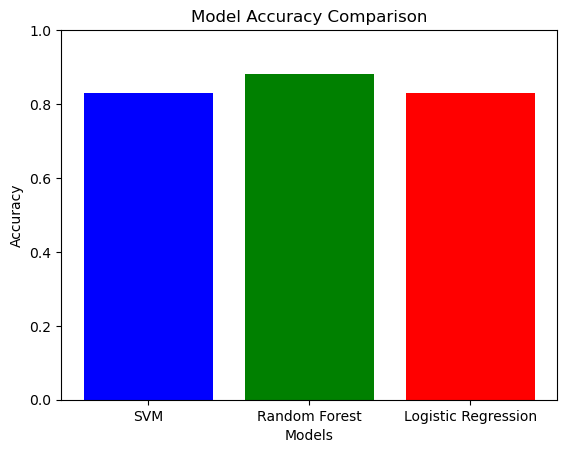

In [13]:
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


In [14]:
# Define parameter grid
rf_param_grid = {'n_estimators': np.arange(50, 200, 50),
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}

# Perform Randomized Search
rf_grid_search = RandomizedSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, random_state=42)
rf_grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)


Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 10}


In [15]:
# Take a single sample from test data
single_input = X_test[0].reshape(1, -1)  # Reshape for model input

# Make prediction
prediction = rf_model.predict(single_input)

# Display the predicted health status
print("Predicted Health Status:", prediction)


Predicted Health Status: [0]


In [16]:
single_input = X_test[1].reshape(1, -1)
# Make prediction
prediction = rf_model.predict(single_input)

# Display the predicted health status
print("Predicted Health Status:", prediction)

Predicted Health Status: [1]


In [17]:
for i in range(5):
    single_input = X_test[i].reshape(1, -1)
    prediction = rf_model.predict(single_input)
    status_label = "Healthy" if prediction[0] == 1 else "Unhealthy"
    print(f"Sample {i} → Predicted Health Status: {status_label}")


Sample 0 → Predicted Health Status: Unhealthy
Sample 1 → Predicted Health Status: Healthy
Sample 2 → Predicted Health Status: Unhealthy
Sample 3 → Predicted Health Status: Healthy
Sample 4 → Predicted Health Status: Unhealthy
